### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    Zhiqian Wang.

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    This project requires the following packages:
    - pandas, numpy, json, folium, matplotlib
    
    To run this project, please make sure the above packages are installed, and then simply clone the repo at http://www.github.com/wangzhiqianusc/inf510_project and execute this notebook. For each %load, please click it twice to make sure it's loaded and run. And then, go through this notebook you will see the visualized result of my project.


3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    I tried to modify the ylabel of my last visualization but I failed. This is directly using matplotlib in pandas dataframe. As I don't fully understand the relationship between plt, ax and df, I was a little bit confused here. Also, some columns in the csvs aren't needed. Some of them have no use. But some of those columns could help me visualize in more dimensions. Now my visualization is lacking details.

4.  **Anything else you feel is relevant to the grading of your project your project.**

    If you try to plot the dataframe 'stategdp' twice, as the type of the columns have been already changed to float(were str before), the exception will occur. You'll have to restart the notebook over.
    Also, I improve the step of cleaning yelp data(yelpdataorganize). Instead of using the raw json file, I clean all the json files and combine them to a dataframe. 

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    Using the number of branches of different chain restaurants in different cities to see how their spatial distribution vary. Compare the sales and the GDP of United States from 2016 to 2019. Finally, find out if there is a relationship between the GDP of the state with the number of chain restaurants.
    Cause the yelp API doesn't offer abundant review data, I can not obtain the time attribute of reviews.

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    *Be sure to call out specific results from plots or data explorations here!*
    I discovered the spatial distribution of the fast food restaurants in 20 large cities. McDonald's and Starbucks have far more branches in many cities than other fast food restaurants. Also I explore the relationship between restaurant sales and GDP.They increased together along recent 4 years. And I find there's no relationship between restaurant numbers and state GDP.

7. **What difficulties did you have in completing the project?**  

    *What didn't work?  What was hard to do?  What stumbling blocks did you run into?*
    It's hard to deal with the json files. And there are a bunch of them. Gladly, I cleaned them and now I know how to deal with json files. Also, I find it's hard to build the data model. And now I realize dataframe and SQL are similar to each other(merge/foreign key), the analysis could be achieved in different data models.

8. **What skills did you wish you had while you were doing the project?**

    *Was there something that you wish you'd have known better while you were doing the project?  If you learned that skill while doing the project, note it here, but even if not, what would have helped?*
    I hope I could be more familiar with pandas and matplotlib, they are easy to use but if I know more about them, I could improve the whole process of my project.

9. **What would you do “next” to expand or augment the project?**

    *If you had to continue this project, what would you add to it?  If you had the skills you mentioned in question 8, what could you do to enhance things?*
    I want to take the review and rating of restaurants into account, and also I hope to obtain the economic data of cities.

In [51]:
import pandas as pd
%matplotlib inline
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import folium
from folium import FeatureGroup, LayerControl, Map, Marker 
from src import grab_data_from_downloaded_raw_files as g
from src import restaurantmap as r
from src import salesgdp as s
from src import countandgdp as c
from src import restaurcnt

In [52]:
#get data
restaurant_dir = './data/restaurant.csv'
yelp_dir = './data/yelp.csv'
stategdp_dir = './data/stategdp.json'
citycoor_dir = './data/citycoordinates.csv'
df_stategdp,df_yelp,df_restaurant,df_citycoor = g.grab_data_from_downloaded_raw_files(restaurant_dir, yelp_dir, stategdp_dir,citycoor_dir)

In [46]:
#using df_yelp,df_citycoor
#calculate the number of different restaurants in different cities
r.restaurantmap(df_yelp,df_citycoor)

This map shows the spatial distribution of different restaurants in different cities. The size of the circles indicates the number of restaurants. Apparently, larger restaurants have larger circles, especially McDonald's and starbucks.

In [4]:
#using df_restaurant
#restaurant sales through different years and GDP through different years

['18,715,040.0', '19,519,424.0', '20,580,223.0']
[18715040.0, 19519424.0, 20580223.0, 21500000]


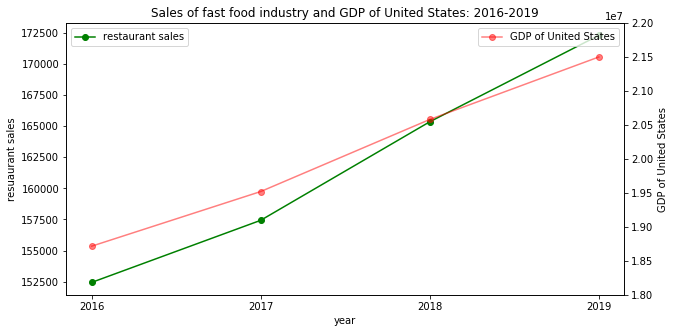

In [5]:
s.salesgdp(df_restaurant,df_stategdp)

The sale of fast food industry was increasing these years. And so was the GDP. Though we can not assert that fast food is a key factor of GDP increasement.

In [6]:
#df_stategdp
#city and their states

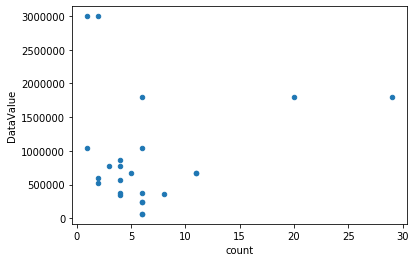

In [53]:
restaurcnt = restaurcnt.restaurcnt(df_yelp,df_citycoor)
c.countandgdp(df_citycoor,df_stategdp,restaurcnt)

Find the correlation between the average count of fast food restaurants in different cities and the gdp of the state where the city belongs to. Each point represents a city. From the scatter plot we can see there's no clear relationship between these two variables.